In [57]:
import pandas as pd
import seaborn as sb

# Guardian Raids
Normal vs rested

In [58]:
gr_history = pd.read_csv('histories/gr.csv')

In [59]:
gr_history

,timestamp,character,ilvl,boss,at_level,rested,first_time,red,blue,stones
0,2022-04-14-20:52:33,Jazzercist,1334,Armored Nacrasena,True,False,False,22,69,2
1,2022-04-15-09:45:28,Jazzercist,1340,Igrexion,True,False,True,54,171,7
2,2022-04-15-09:53:15,Jazzercist,1340,Igrexion,True,False,False,30,77,5
3,2022-04-15-11:31:46,Derplearning,1309,Armored Nacrasena,True,True,False,43,130,5
4,2022-04-15-11:39:16,Derplearning,1309,Armored Nacrasena,True,False,False,23,69,3
...,...,...,...,...,...,...,...,...,...,...
56,2022-05-02-10:14:13,Trif,1370,Night Fox Yoho,True,True,False,69,215,6
57,2022-05-02-10:55:12,Jazzercist,1367,Igrexion,True,True,False,56,169,9
58,2022-05-02-11:21:17,Jazzercist,1367,Igrexion,True,True,False,55,158,9
59,2022-05-02-13:07:50,Derplearning,1325,Armored Nacrasena,True,True,False,46,134,6


In [60]:
gr_df = (
    gr_history
    .query('stones > 0')
    .query('ilvl >= 1100')
    .query('first_time == False')
) 

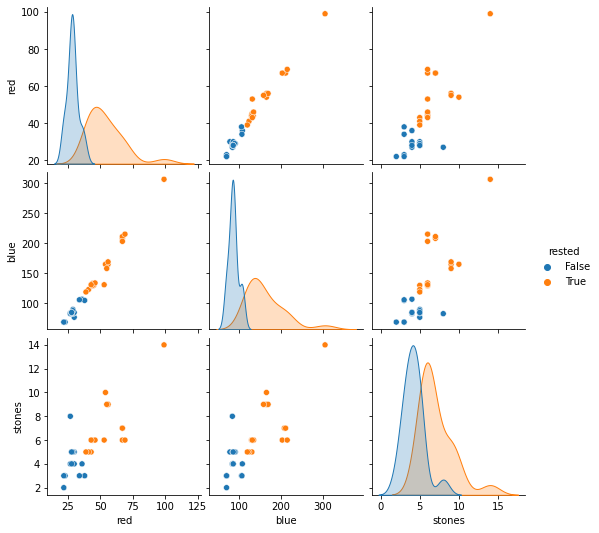

In [61]:
sb.pairplot(gr_df, vars=('red', 'blue', 'stones'), hue='rested')

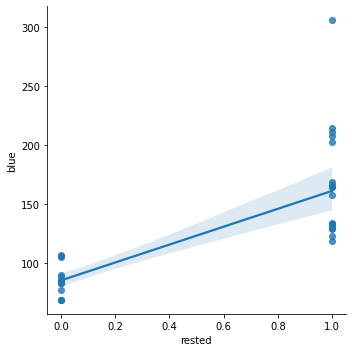

In [62]:
sb.lmplot(data=gr_df, x='rested', y='blue')


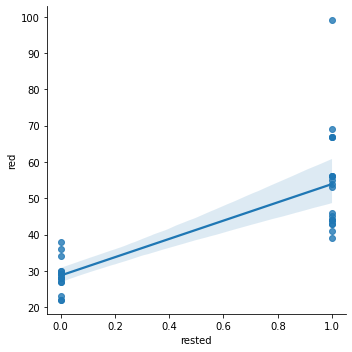

In [63]:
sb.lmplot(data=gr_df, x='rested', y='red')

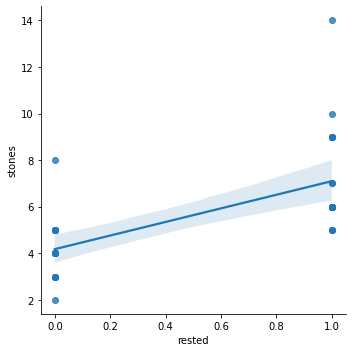

In [64]:
sb.lmplot(data=gr_df, x='rested', y='stones')

In [65]:
gr_df.groupby('rested')['red'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,17.0,28.705882,4.341151,22.0,27.0,28.0,30.0,38.0
True,21.0,53.904762,14.056688,39.0,44.0,53.0,56.0,99.0


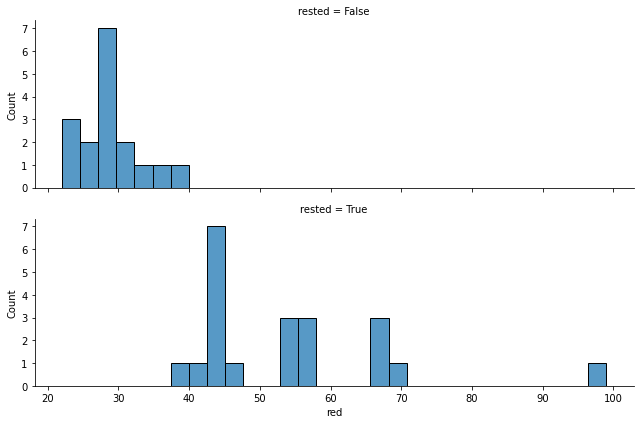

In [66]:
sb.displot(gr_df, x='red', row='rested', height=3, aspect=3, bins=30)

In [67]:
gr_df[gr_df.rested == True]['red'].mean() / gr_df[gr_df.rested == False]['red'].mean()

1.8778298204527712

In [68]:
gr_df.groupby('rested')['blue'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,17.0,85.411765,11.731682,69.0,83.0,84.0,88.0,107.0
True,21.0,161.380952,45.690783,119.0,130.0,134.0,169.0,306.0


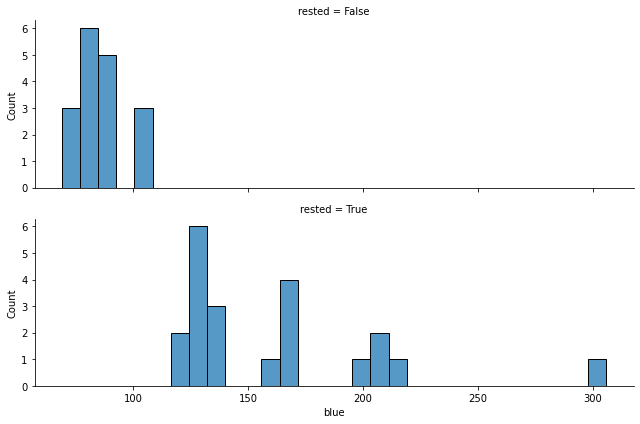

In [69]:
sb.displot(gr_df, x='blue', row='rested', height=3, aspect=3, bins=30)

In [70]:
gr_df[gr_df.rested == True]['blue'].mean() / gr_df[gr_df.rested == False]['blue'].mean()

1.889446412173685

In [71]:
gr_df.groupby('rested')['stones'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,17.0,4.176471,1.333946,2.0,3.0,4.0,5.0,8.0
True,21.0,7.095238,2.188716,5.0,6.0,6.0,9.0,14.0


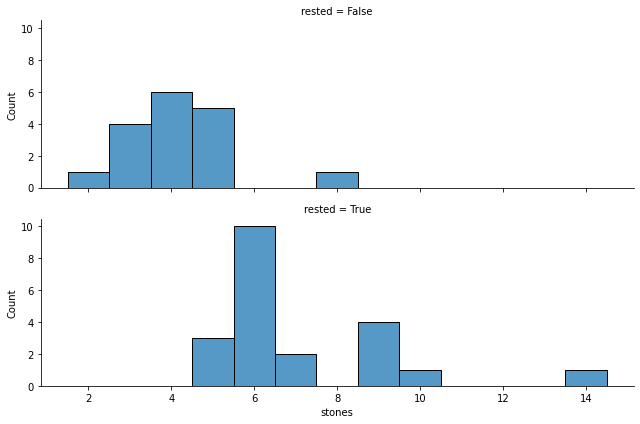

In [72]:
sb.displot(gr_df, x='stones', row='rested', height=3, aspect=3, discrete=True)

In [73]:
gr_df[gr_df.rested == True]['stones'].mean() / gr_df[gr_df.rested == False]['stones'].mean()

1.6988598256203888

# Chaos Dungeons
Normal vs rested rewards

In [74]:
cd_aor_history = pd.read_csv('app/data/histories/cd_aor.csv')

cd_aor_history

,timestamp,character,ilvl,dungeon,at_level,rested,bonus_floor,red,blue,shards,stones
0,2022-04-14-20:28:10,Jazzercist,1334,Moon-1,True,False,None,42,105,1280,1
1,2022-04-15-08:55:54,Jazzercist,1334,Moon-1,True,False,None,40,163,1264,0
2,2022-04-15-09:05:30,Jazzercist,1334,Moon-1,True,False,None,37,157,1432,0
3,2022-04-15-11:15:00,Derplearning,1309,Star-1,True,True,None,56,227,1956,5
4,2022-04-15-11:22:03,Derplearning,1309,Star-1,True,False,None,29,110,984,2
...,...,...,...,...,...,...,...,...,...,...,...
64,2022-05-02-10:26:47,Jazzercist,1366,Moon-3,True,True,None,98,341,3351,3
65,2022-05-02-10:34:22,Jazzercist,1366,Moon-3,True,True,None,118,379,3606,9
66,2022-05-02-12:46:06,Derplearning,1325,Moon-1,True,True,None,71,260,2744,3
67,2022-05-02-12:54:42,Derplearning,1325,Moon-1,True,True,None,70,273,2937,9


In [75]:
cd_df = (
    cd_aor_history
    .query('stones < 20')
    .query('shards > 0')
    .query('bonus_floor == "None"')
    .query('ilvl >= 1100')
    .drop(['at_level', 'ilvl'], axis=1)
)

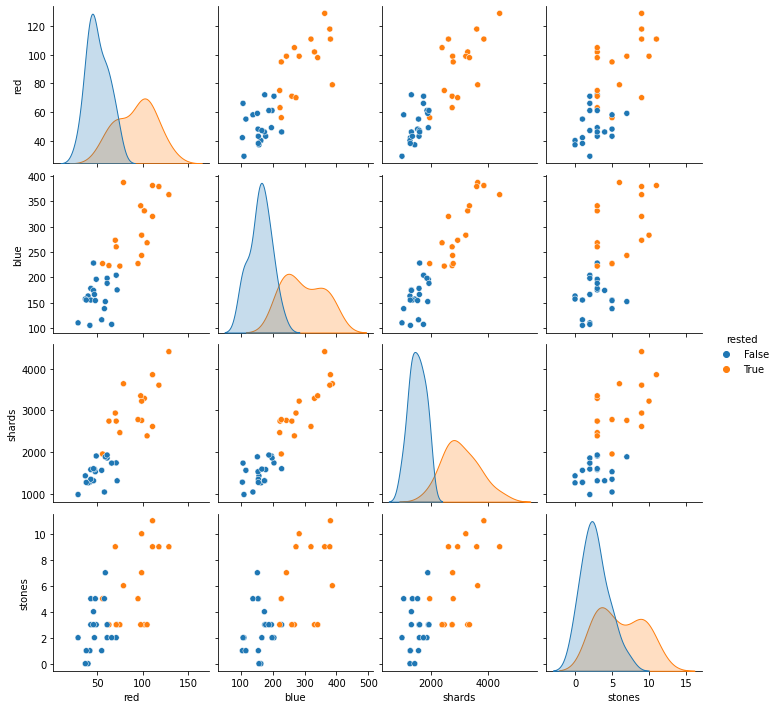

In [76]:
sb.pairplot(cd_df, vars=('red', 'blue', 'shards', 'stones'), hue='rested')

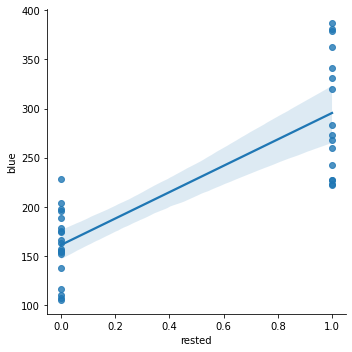

In [77]:
sb.lmplot(data=cd_df, x='rested', y='blue')


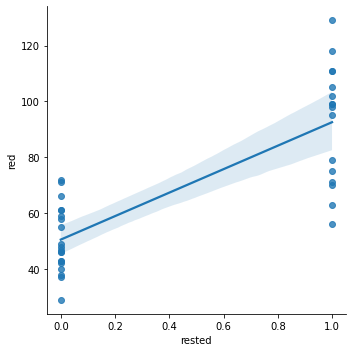

In [78]:
sb.lmplot(data=cd_df, x='rested', y='red')

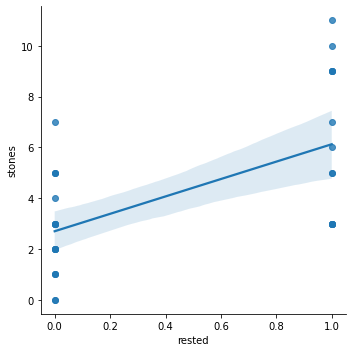

In [79]:
sb.lmplot(data=cd_df, x='rested', y='stones')

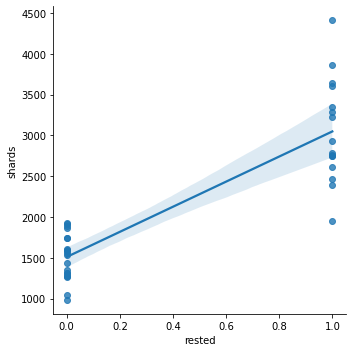

In [80]:
sb.lmplot(data=cd_df, x='rested', y='shards')

In [81]:
cd_df.groupby('rested')['red'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,20.0,50.5500,11.807558,29.0,42.75,47.5,59.5,72.0
True,16.0,92.5625,21.124926,56.0,74.00,98.5,106.5,129.0


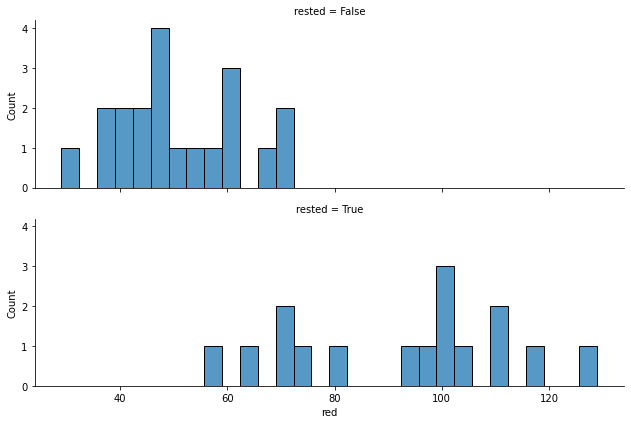

In [82]:
sb.displot(cd_df, x='red', row='rested', height=3, aspect=3, bins=30)

In [83]:
cd_df[cd_df.rested == True]['red'].mean() / cd_df[cd_df.rested == False]['red'].mean()

1.8311078140454997

In [84]:
cd_df.groupby('rested')['blue'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,20.0,160.95,33.848696,105.0,148.5,160.0,180.5,228.0
True,16.0,295.50,61.438316,222.0,239.0,278.0,346.5,387.0


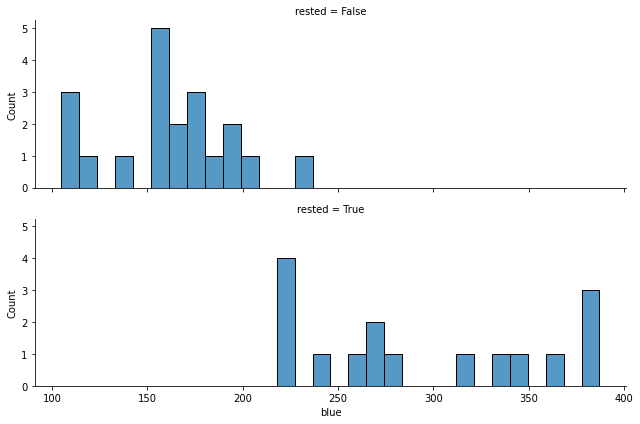

In [85]:
sb.displot(cd_df, x='blue', row='rested', height=3, aspect=3, bins=30)

In [86]:
cd_df[cd_df.rested == True]['blue'].mean() / cd_df[cd_df.rested == False]['blue'].mean()

1.8359739049394224

In [87]:
cd_df.groupby('rested')['stones'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,20.0,2.700,1.809333,0.0,1.75,2.5,3.25,7.0
True,16.0,6.125,2.986079,3.0,3.00,5.5,9.00,11.0


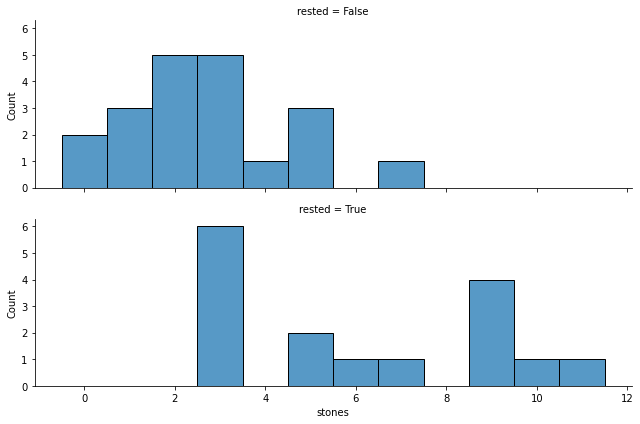

In [88]:
sb.displot(cd_df, x='stones', row='rested', height=3, aspect=3, discrete=True)

In [89]:
cd_df[cd_df.rested == True]['stones'].mean() / cd_df[cd_df.rested == False]['stones'].mean()

2.268518518518518

In [90]:
cd_df.groupby('rested')['shards'].describe()

,count,mean,std,min,25%,50%,75%,max
rested,,,,,,,,
False,20.0,1509.7500,281.207897,984.0,1304.75,1547.5,1738.25,1931.0
True,16.0,3048.3125,624.632022,1956.0,2711.75,2859.0,3414.75,4410.0


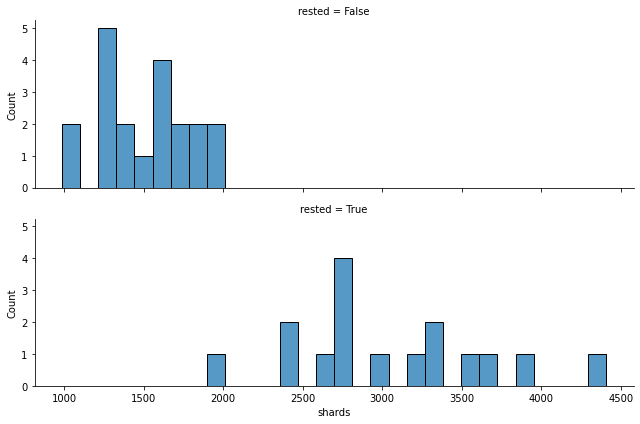

In [91]:
sb.displot(cd_df, x='shards', row='rested', height=3, aspect=3, bins=30)

In [92]:
cd_df[cd_df.rested == True]['shards'].mean() / cd_df[cd_df.rested == False]['shards'].mean()

2.019084285477728

# Chaos Dungeon Infinite Grind

In [98]:
cd_ig_history = pd.read_csv('app/data/histories/cd_ig.csv')
cd_ig_history = cd_ig_history[cd_ig_history.bonus_floor == False]
cd_ig_history

,timestamp,character,ilvl,dungeon,at_level,bonus_floor,floor,currency_orbs,currency_shards,red,blue
0,2022-05-02-18:02:35,Trif,1375,Sun-1,True,False,1,3,33,0,0
1,2022-05-02-18:02:35,Trif,1375,Sun-1,True,False,2,13,74,0,13
2,2022-05-02-18:02:35,Trif,1375,Sun-1,True,False,3,7,53,3,4
3,2022-05-02-18:09:16,Trif,1375,Sun-1,True,False,1,5,39,0,0
4,2022-05-02-18:09:16,Trif,1375,Sun-1,True,False,2,6,90,7,26
5,2022-05-02-18:09:16,Trif,1375,Sun-1,True,False,3,4,56,0,0
6,2022-05-02-18:24:47,Trif,1375,Sun-1,True,False,1,2,29,0,0
7,2022-05-02-18:24:47,Trif,1375,Sun-1,True,False,2,5,88,3,12
8,2022-05-02-18:24:47,Trif,1375,Sun-1,True,False,3,5,63,0,2
9,2022-05-02-18:33:50,Trif,1375,Sun-1,True,False,1,1,33,0,0


<AxesSubplot:xlabel='floor', ylabel='currency_shards'>

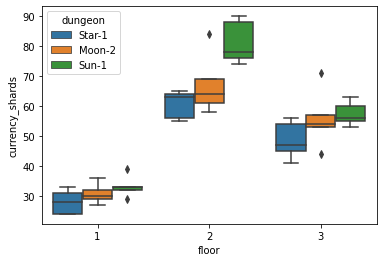

In [94]:
sb.boxplot(
    data=cd_ig_history,
    x='floor',
    y='currency_shards',
    hue='dungeon',
    hue_order=('Star-1', 'Moon-2', 'Sun-1')
)

<AxesSubplot:xlabel='floor', ylabel='currency_shards'>

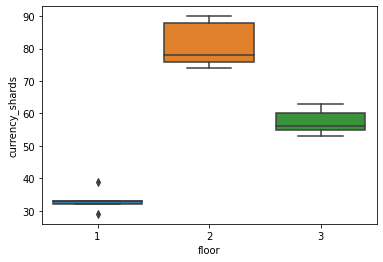

In [106]:
sb.boxplot(
    data=cd_ig_history.query('at_level == True'),
    x='floor',
    y='currency_shards',
)

In [113]:
(
    cd_ig_history
    .query('at_level == True')
    .drop('ilvl', axis=1)
    .groupby('floor')
    .describe(percentiles=[0.5])
    .T
)

floor                          1          2          3
currency_orbs   count   5.000000   5.000000   5.000000
                mean    3.000000   8.600000   5.200000
                std     1.581139   3.646917   1.095445
                min     1.000000   5.000000   4.000000
                50%     3.000000   7.000000   5.000000
                max     5.000000  13.000000   7.000000
currency_shards count   5.000000   5.000000   5.000000
                mean   33.200000  81.200000  57.400000
                std     3.633180   7.293833   4.037326
                min    29.000000  74.000000  53.000000
                50%    33.000000  78.000000  56.000000
                max    39.000000  90.000000  63.000000
red             count   5.000000   5.000000   5.000000
                mean    0.000000   5.600000   0.600000
                std     0.000000   4.219005   1.341641
                min     0.000000   0.000000   0.000000
                50%     0.000000   7.000000   0.000000
                max     0.000000  11.000000   3.000000
blue            count   5.000000   5.000000   5.000000
                mean    0.000000  15.800000   4.600000
                std     0.000000   5.761944   4.219005
                min     0.000000  12.000000   0.000000
                50%     0.000000  14.000000   4.000000
                max     0.000000  26.000000  11.000000

<AxesSubplot:xlabel='floor', ylabel='currency_orbs'>

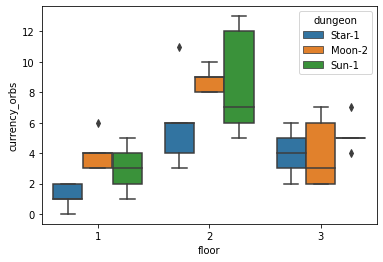

In [95]:
sb.boxplot(
    data=cd_ig_history,
    x='floor',
    y='currency_orbs',
    hue='dungeon',
    hue_order=('Star-1', 'Moon-2', 'Sun-1')
)

<AxesSubplot:xlabel='floor', ylabel='red'>

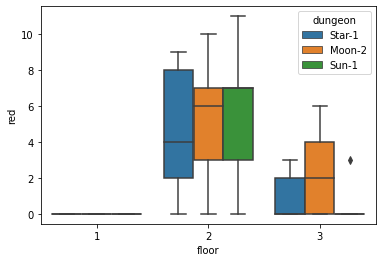

In [96]:
sb.boxplot(
    data=cd_ig_history,
    x='floor',
    y='red',
    hue='dungeon',
    hue_order=('Star-1', 'Moon-2', 'Sun-1')
)

<AxesSubplot:xlabel='floor', ylabel='blue'>

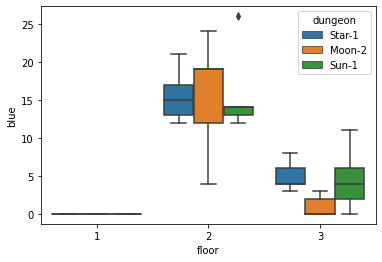

In [97]:
sb.boxplot(
    data=cd_ig_history,
    x='floor',
    y='blue',
    hue='dungeon',
    hue_order=('Star-1', 'Moon-2', 'Sun-1')
)